In [23]:
#insted of "visualize/display information about number (or fraction) of theses theses supervised
#by people with various degrees (Bc./Ing./Ph.D./ ...)" I visualized information about fraction of theses
#delivered in each year (all theses, just bachelor and just master). I wasn't able to find information
#about supervisor degree in data which I have scretched

#--------------------------------------------------------------------------------------------------------#
#Use tools available for Python to plot charts and tables to visualize/display this information:         #
#    ->fraction of theses delivered in each year (all theses, just bachelor and just master)             #
#--------------------------------------------------------------------------------------------------------#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # standard convention for importing the plotting tool
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

#get theses info data frame from csv file
all_theses_df = pd.read_csv('pdd_homework1_wz_all_data.csv', sep='|')
all_theses_df['DATE_OF_DEFENCE'] = all_theses_df['DATE_OF_DEFENCE'].str[:4]
del all_theses_df['Unnamed: 0']
all_theses_df = all_theses_df.replace(np.nan, 'N/A', regex=True)

#get all years of defence       
th_dates_df = all_theses_df['DATE_OF_DEFENCE']
th_years = []

#there is try block because sometimes year is not available
for d in th_dates_df :
    try :
        if d=='N/A' :
            continue
        if d in th_years :
            continue
        else :
            th_years.append(d)
    except TypeError :
        continue
        
#get all types of theses
th_types_df = all_theses_df['THESIS_TYPE']
th_types = []

for t in th_types_df :
    if t in th_types :
        continue
    else :
        th_types.append(t)
    
    if len(th_types)==2 :
        break
        
#save seeking informations into data frame and show them
# df is to store information with type thesis_type
#df_all is to store information without 
df = pd.DataFrame(columns =['YEAR','THESIS_TYPE','NUMBER_OF_THESES'])
df_all = pd.DataFrame(columns =['YEAR','NUMBER_OF_THESES'])
numOfThPerYear = []


for th_year in th_years :
    
    #to store information without thesis type
    temp_df = all_theses_df[(all_theses_df.DATE_OF_DEFENCE==th_year)]
    count = len(temp_df)
    if count>0 :
            tmp_dict = {
                "th_year" : th_year,
                "num_of_th" : count
            }
            numOfThPerYear.append(tmp_dict)
            df_all = df_all.append({'YEAR' : th_year, 'NUMBER_OF_THESES' : count}, ignore_index = True)
    
    
    for th_type in th_types :
        #we count theses of special faculty, year and type
        temp_df = all_theses_df[(all_theses_df.DATE_OF_DEFENCE==th_year)&(all_theses_df.THESIS_TYPE==th_type)]
        count = len(temp_df)
            
        #in some years in some faculties there was no theses of such type
        if count>0 :
            tmp_dict = {
                "th_year" : th_year,
                "th_type" : th_type,
                "num_of_th" : count
            }
            numOfThPerYear.append(tmp_dict)
            df = df.append({'YEAR' : th_year, 'THESIS_TYPE' : th_type, 'NUMBER_OF_THESES' : count}, ignore_index = True)

sort_df = df.sort_values(by=['YEAR'], ascending=False)            
sort_df_all = df_all.sort_values(by=['YEAR'], ascending=False)

all_colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','yellow','green','indigo','red','silver','pink','orange','blue','purple']

def drawPiePlot(data_frame, th_type = None) :
    global all_colors
    
    if th_type != None :
        data_frame = data_frame[data_frame.THESIS_TYPE == th_type]
        labels = list(data_frame['YEAR'])
        tmp_str1 = "Fraction of "
        tmp_str2 = " theses delivered in each year"
        print(tmp_str1+th_type+tmp_str2)
    else :
        print("Fraction of all theses delivered in each year")
    
    labels = list(data_frame['YEAR'])
    sizes = list(data_frame['NUMBER_OF_THESES'])
    colors = all_colors[:len(labels)]

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()

    YEAR NUMBER_OF_THESES
0   2018             1507
1   2018             1496
2   2017             1950
3   2017             2376
4   2014             1799
5   2014             2114
6   2011             1994
7   2011             1947
8   2012             1995
9   2012             2055
10  2013             2076
11  2013             2501
12  2015              651
13  2015              972
14  2016              960
15  2016             1260
16  2006               44
17  2007               41
18  2010               44
19  2010               82
20  2009               58
21  2009               81
22  2008               36
23  2008               39


Fraction of all theses delivered in each year


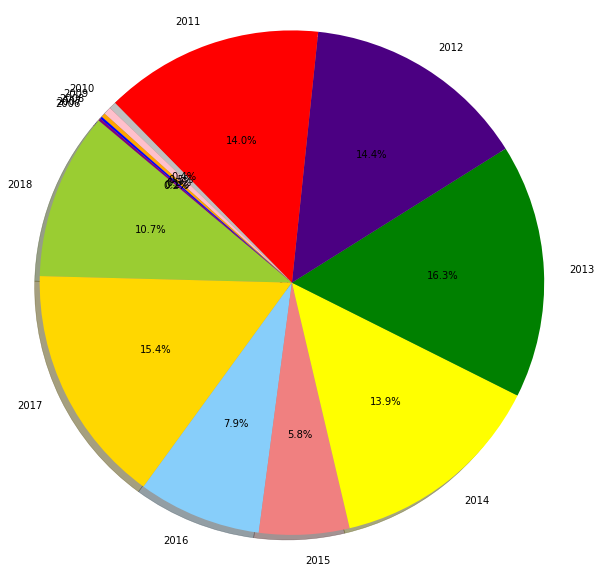

In [28]:
drawPiePlot(sort_df_all)

Fraction of Master theses delivered in each year


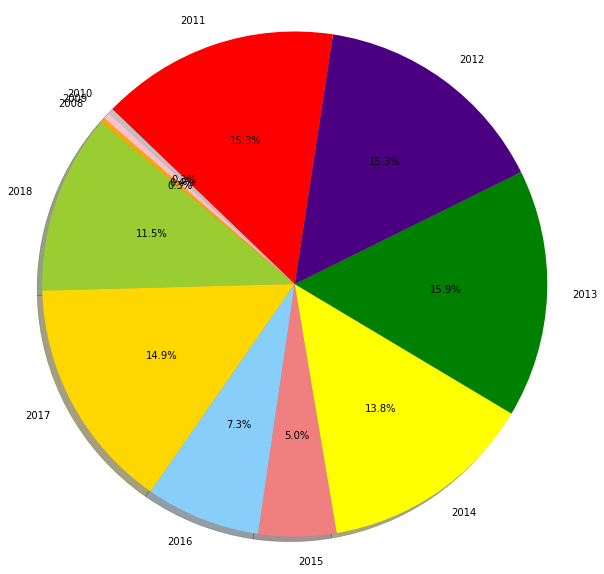

In [29]:
drawPiePlot(sort_df,"Master")

Fraction of Bachelor theses delivered in each year


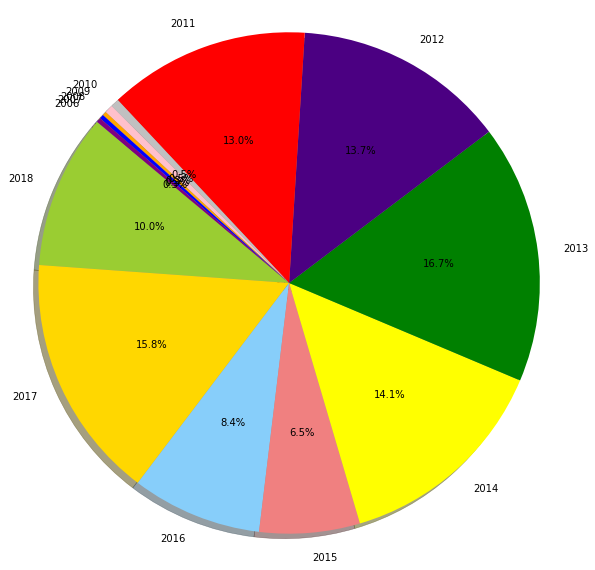

In [30]:
drawPiePlot(sort_df,"Bachelor")